# 🎬 Project: StreamChill User Analytics
**Author:** Gaurav Dhangar  
**Topic:** Exploratory Data Analysis (EDA) & Churn Prediction  

### 📖 The Scenario
We are analyzing **"StreamChill"**, a fictional streaming service. 
**The Problem:** Users are cancelling subscriptions (Churning).  
**The Goal:** Use EDA to find patterns. Do TV users watch more? Does Age affect Churn?

Let's dive in! 🕵️‍♂️

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style for "Twitter-worthy" charts
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset we created earlier
df = pd.read_csv('streamchill_data.csv')

df.head()

,User_ID,Age,Subscription_Type,Monthly_Revenue,Join_Date,Last_Device,Total_Watch_Time_Hrs,Favorite_Genre,Churned
0,1,53,Free,0.00,2021-01-01 00:00:00,Tablet,12.78,Documentary,0
1,2,66,Standard,12.99,2021-01-01 01:00:00,Mobile,24.41,Horror,1
2,3,43,Free,0.00,2021-01-01 02:00:00,Mobile,24.87,Sci-Fi,0
3,4,29,Standard,12.99,2021-01-01 03:00:00,Laptop,36.74,Documentary,0
4,5,57,Free,0.00,2021-01-01 04:00:00,TV,29.90,Romance,0


## Step 1: The "Sanity Check"
Before analyzing, we must understand the data structure. Let's look at the raw rows and check for data types.

In [5]:
# Display first 5 rows
display(df.head())

# Check data types and missing values
print("-" * 30)
df.info()

,User_ID,Age,Subscription_Type,Monthly_Revenue,Join_Date,Last_Device,Total_Watch_Time_Hrs,Favorite_Genre,Churned
0,1,53,Free,0.00,2021-01-01 00:00:00,Tablet,12.78,Documentary,0
1,2,66,Standard,12.99,2021-01-01 01:00:00,Mobile,24.41,Horror,1
2,3,43,Free,0.00,2021-01-01 02:00:00,Mobile,24.87,Sci-Fi,0
3,4,29,Standard,12.99,2021-01-01 03:00:00,Laptop,36.74,Documentary,0
4,5,57,Free,0.00,2021-01-01 04:00:00,TV,29.90,Romance,0


------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   User_ID               10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Subscription_Type     10000 non-null  object 
 3   Monthly_Revenue       10000 non-null  float64
 4   Join_Date             10000 non-null  object 
 5   Last_Device           10000 non-null  object 
 6   Total_Watch_Time_Hrs  9500 non-null   float64
 7   Favorite_Genre        10000 non-null  object 
 8   Churned               10000 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 703.3+ KB


## 🧹 Step 2: The Clean-Up
**Observation:** It looks like `Total_Watch_Time_Hrs` has some missing values (approx 5%).
**Action:** We will fill these gaps. 
* *Why Median?* Watch time can have outliers (people who binge-watch 24/7). The median is more robust than the mean.

In [6]:
# Check for nulls before
print(f"Missing values before: {df['Total_Watch_Time_Hrs'].isnull().sum()}")

# Fill missing values with the Median
median_watch_time = df['Total_Watch_Time_Hrs'].median()
df['Total_Watch_Time_Hrs'].fillna(median_watch_time, inplace=True)

# Verify
print(f"Missing values after: {df['Total_Watch_Time_Hrs'].isnull().sum()}")

Missing values before: 500
Missing values after: 0


## 📊 Step 3: Who are our users? (Univariate Analysis)
Let's look at the **Age Distribution**. 
* Are we a platform for Gen Z or Boomers?

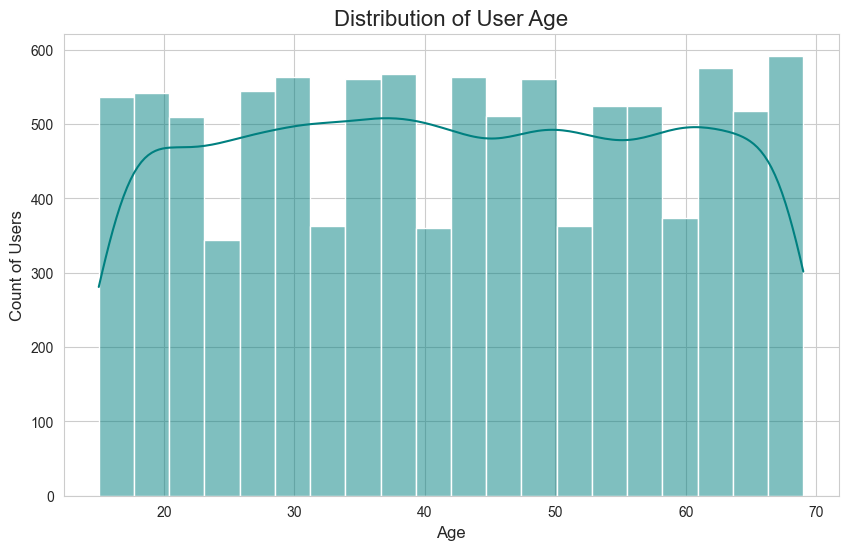

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='teal')

plt.title('Distribution of User Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count of Users', fontsize=12)
plt.show()

## 📺 Step 4: Does Screen Size Matter?
**Hypothesis:** People watching on bigger screens (TV) spend more time on the app than Mobile users.
Let's test this with a **Boxplot**.

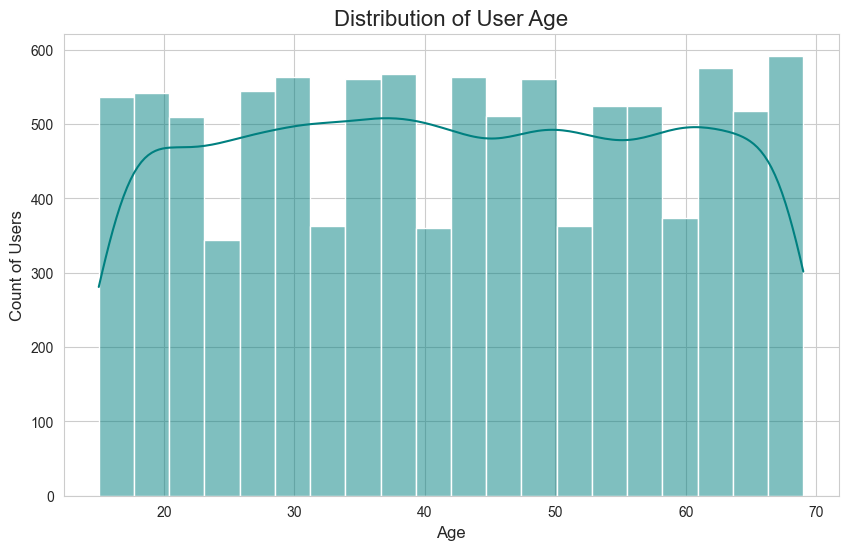

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='teal')

plt.title('Distribution of User Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count of Users', fontsize=12)
plt.show()

## 🕵️‍♀️ Step 5: The "Why" (Correlation Matrix)
The Golden Question: **What correlates with Churn?**
* **Negative Correlation (Red/Blue):** As X goes up, Churn goes DOWN.
* **Positive Correlation:** As X goes up, Churn goes UP.

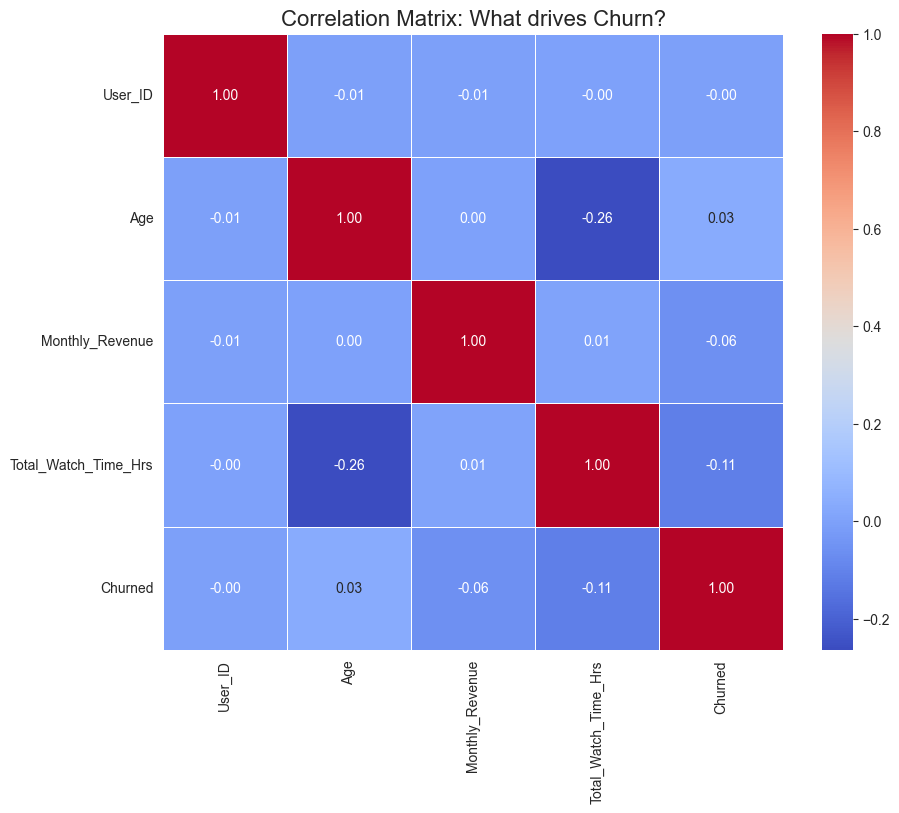

In [13]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix: What drives Churn?', fontsize=16)
plt.show()

##  Conclusion & Business Insights
Based on our EDA, we found 3 key insights for the marketing team:

1.  **TV is King:** TV users have significantly higher watch times than Mobile users. *Strategy: Improve the TV App UI.*
2.  **Watch Time = Loyalty:** There is a strong negative correlation between Watch Time and Churn. Users who watch less, leave.
3.  **Age Factor:** Our user base is bimodal (Young & Old), but age doesn't strongly correlate with Churn.

**Next Steps:** Build a Machine Learning model (Logistic Regression) to predict Churn probability for new users.